In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np


In [4]:
class ODEsolver(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'my_loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)

    with tf.GradientTape() as tape:
      with tf.GradientTape() as tape2:
        tape2.watch(x)
        y_pred = self(x, training = True)
      dy = tape2.gradient(y_pred, x)
      x_o = tf.zeros((batch_size, 1))
      y_o = self(x_o, training = True)
      eq = x*dy + y_pred - x**2 * tf.math.cos(x)
      ic = y_o 
      loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic)

    grads = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    self.loss_tracker.update_state(loss)

    return {'my_loss': self.loss_tracker.result()}

  

In [5]:
model = ODEsolver()
model.add(Dense(10, activation = 'tanh', input_shape = (1,)))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'linear'))

In [6]:
model.summary()

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = RMSprop(), metrics = ['my_loss'])

In [8]:
x = tf.linspace(-5, 5, 1000)
history = model.fit(x, epochs = 300, verbose = 1)

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - my_loss: 36.5791
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - my_loss: 32.4077
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - my_loss: 32.5959
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - my_loss: 31.0876
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - my_loss: 28.0307
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - my_loss: 25.3156
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - my_loss: 20.4950
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - my_loss: 19.3253
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - my_loss: 17.1157
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - my_loss: 14.8566
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - my_loss: 12.5275
Epoch 12/300
32/32 [==============================] - 0s 3ms/step - my_los

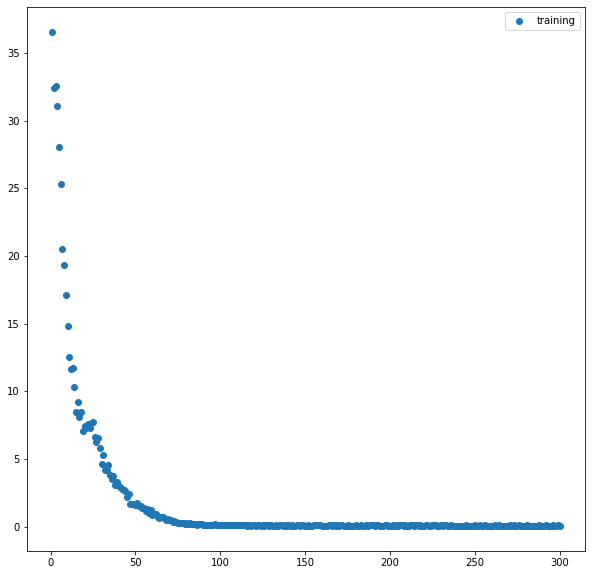

In [9]:
history_dict = history.history
loss_values = history_dict['my_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.legend()
plt.show()

In [10]:
model.compile(optimizer = Adam(), metrics = ['my_loss'])

In [11]:
x = tf.linspace(-5, 5, 1000)
history = model.fit(x, epochs = 300, verbose = 1)

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - my_loss: 0.0286
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0080
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0081
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0079
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0071
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - my_loss: 0.0246
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0128
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0182
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0130
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0231
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0507
Epoch 12/300
32/32 [==============================] - 0s 2ms/step - my_loss: 0.0261
E

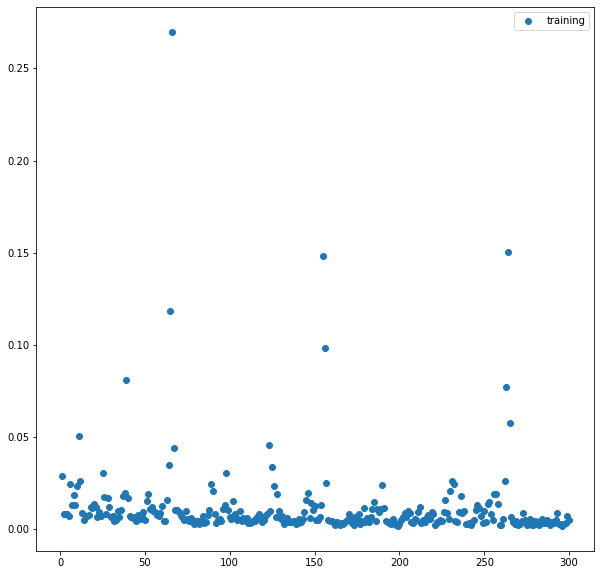

In [12]:
history_dict = history.history
loss_values = history_dict['my_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.legend()
plt.show()

In [13]:
def solution_1(x):
  return ((x**2 - 2)*np.sin(x))/x + 2*np.cos(x)



32/32 [==============================] - 0s 5ms/step


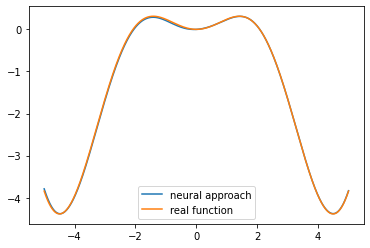

In [15]:
x_test = tf.linspace(-5, 5, 1000)
a = model.predict(x_test)
plt.plot(x_test, a, label = 'neural approach')
plt.plot(x_test, solution_1(x_test), label = 'real function')
plt.legend()
plt.show()